In [27]:
import time

import av
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from datasets import EchoNetDataset
from models import EchoNetClassifier

In [28]:
filelist = pd.read_csv('/home/tienyu/data/EchoNet-Dynamic/FileList.csv')
tracing = pd.read_csv('/home/tienyu/data/EchoNet-Dynamic/VolumeTracings.csv')

In [44]:
valid_clips = tracing.FileName.str.replace('.avi', '').unique()
valid_idx = np.isin(filelist.FileName, valid_clips)

In [36]:
valid_filelist = filelist[valid_idx]

4


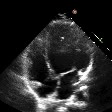

22


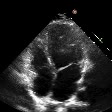

In [283]:
filename = valid_filelist[valid_filelist.Split=='TRAIN'].FileName.iloc[2929] + '.avi'
grouped_df = tracing[tracing.FileName == filename].groupby('Frame')
keys = tracing[tracing.FileName == filename].Frame.unique()
selected_frames = list(range(i, i + end, sampling_frequency))
# for key, item in grouped_df:
#     print(grouped_df.get_group(key), "\n\n")
filepath = '/home/tienyu/data/EchoNet-Dynamic/Videos/' + filename
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
container = av.open(filepath)
k = 0
for j, frame in enumerate(container.decode(video=0)):        
    if j in keys:
        print(j)
        coordinates = grouped_df.get_group(j)[['X1', 'Y1', 'X2', 'Y2']].values.tolist()[1:]
        coordinates = np.array(coordinates).flatten()
        f = frame.to_image()
        draw = ImageDraw.Draw(f)
        draw.polygon(coordinates, fill=True)
#         for c in coordinates:
#             draw.rectangle(c,  fill=True)
        display(f)

In [284]:
coordinates

array([51.79317925, 28.03410373, 56.60454203, 26.23708872, 51.33333333,
       30.42800201, 60.39303645, 27.04425747, 51.33333333, 32.6501506 ,
       63.33038634, 28.16932358, 51.33333333, 34.8722992 , 65.37321598,
       29.62848761, 51.33333333, 37.09444779, 67.41604562, 31.08765164,
       51.33333333, 39.31659639, 68.97982943, 32.7257364 , 51.42152368,
       41.50580642, 70.47662384, 34.3888413 , 51.51460384, 43.69319013,
       71.91976714, 36.07198456, 51.60768399, 45.88057385, 72.66430403,
       38.01605311, 51.70076415, 48.06795757, 73.40884092, 39.96012166,
       51.79384431, 50.25534128, 74.15337781, 41.90419021, 52.15766415,
       52.34160536, 74.8979147 , 43.84825877, 52.54065683, 54.42070849,
       75.6424516 , 45.79232732, 52.92364951, 56.49981163, 76.17320645,
       47.81624217, 53.30664219, 58.57891476, 76.42084117, 49.94590069,
       53.92247798, 60.5710524 , 76.66847588, 52.07555921, 54.65340929,
       62.52020255, 76.91611059, 54.20521773, 55.3843406 , 64.46

24


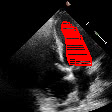

35


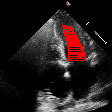